# House Price Prediction

## Importing libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor




## Load dataset

In [79]:
df = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 13 - House Price Prediction/House_Rent_Dataset.csv')

## Dataset Analysis

In [80]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [81]:
df.shape

(4746, 12)

In [82]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [84]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


### Checking if there is any null value 

In [85]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [86]:
df.duplicated().sum()

0

There are no null values or duplicates in the dataset.

### 5 highest house rents present in the dataset

In [87]:
df['Rent'].sort_values(ascending = False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

### 5 Lowest house rents present in the dataset

In [88]:
df['Rent'].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

## Data Visualization

### Bar plot for number of house in each city which is available for rent

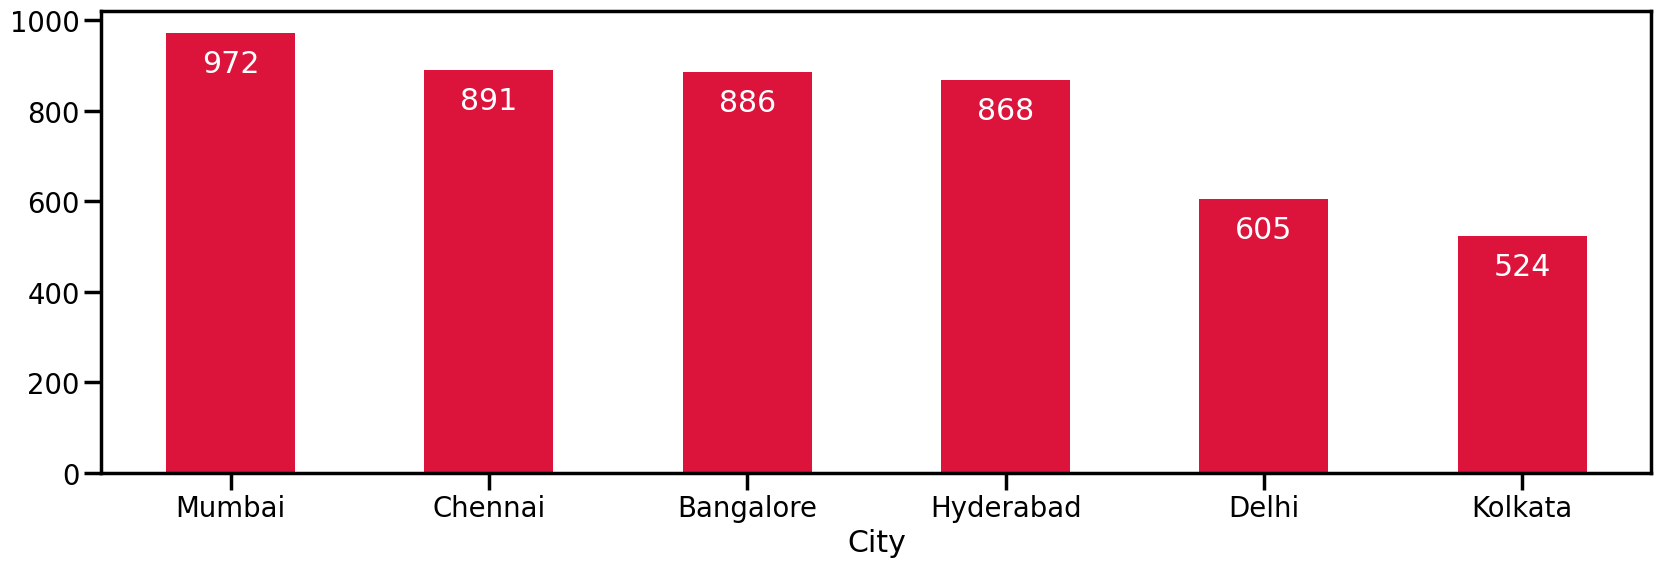

In [89]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(20,6))
ax = df['City'].value_counts().plot(kind = 'bar', color='crimson', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 100), ha='center', va='bottom', color='white')

### Bar plot on different types of furnishing status

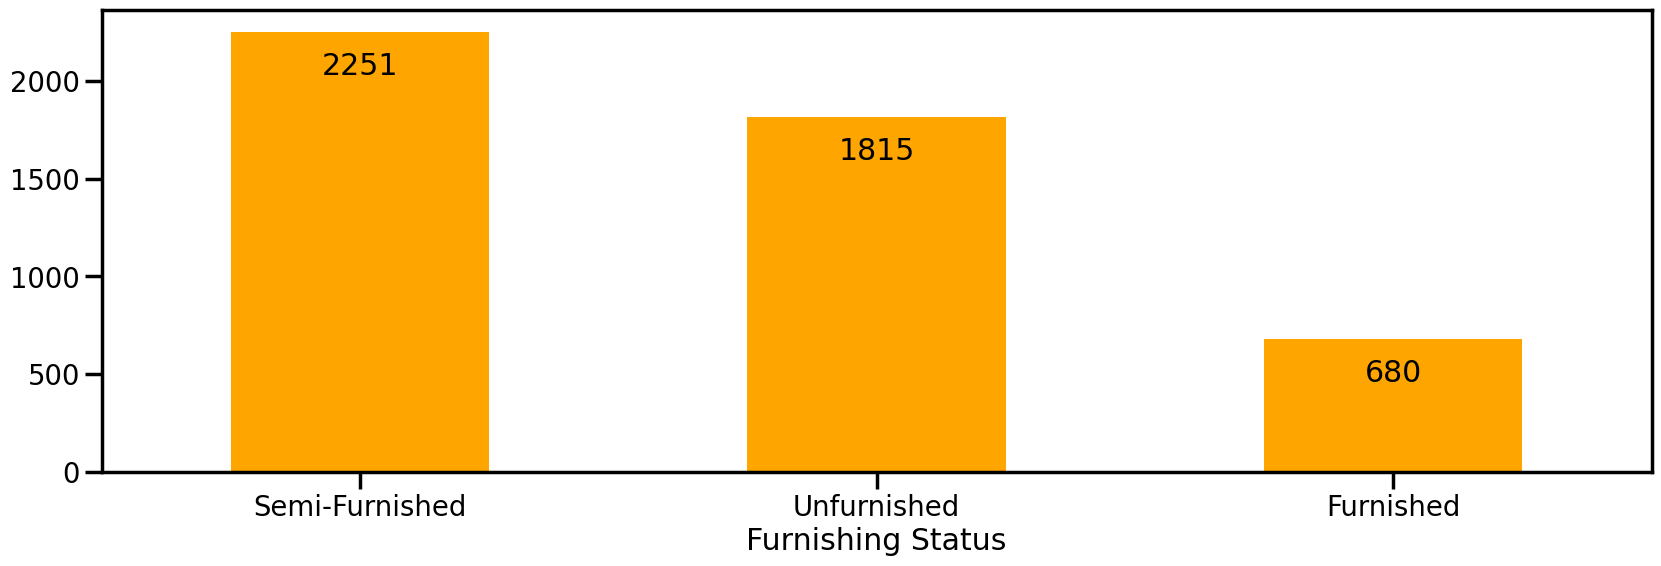

In [90]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(20,6))
ax = df['Furnishing Status'].value_counts().plot(kind = 'bar', color='orange', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha='center', va='bottom', color='black')

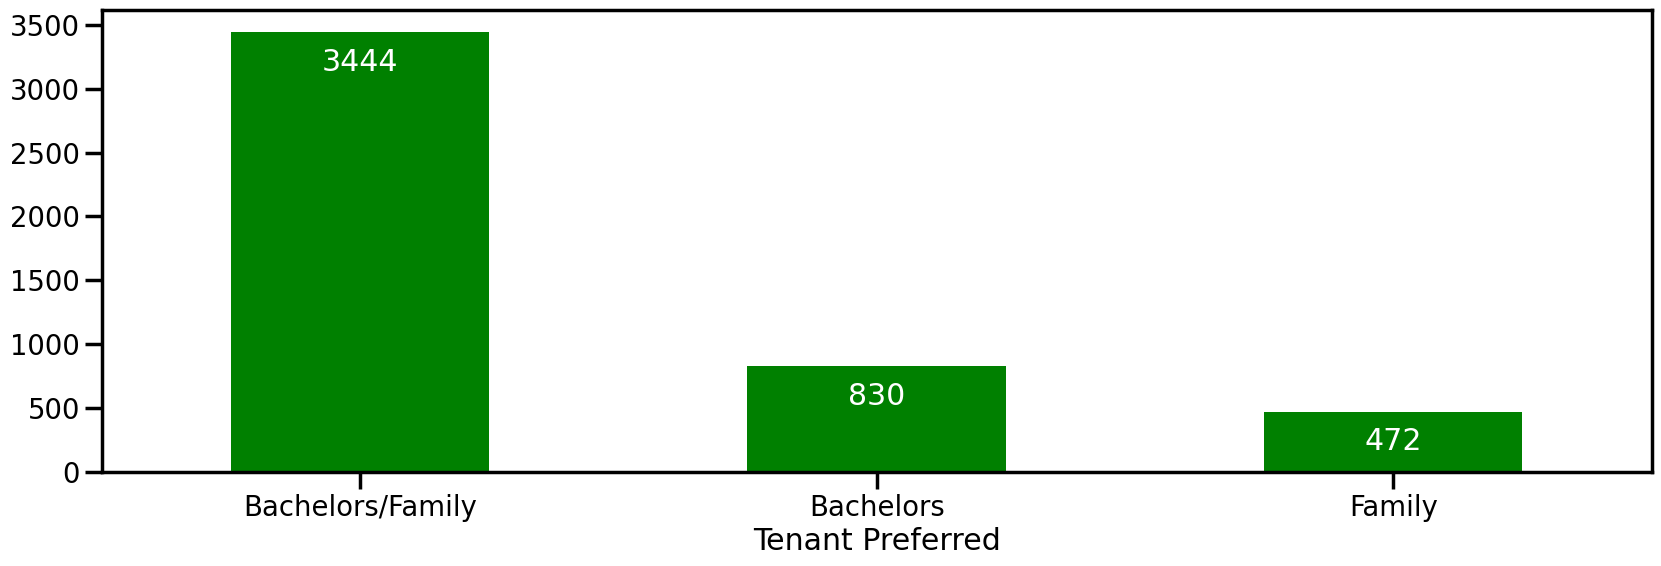

In [91]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(20,6))
ax = df['Tenant Preferred'].value_counts().plot(kind = 'bar', color='green', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 350), ha='center', va='bottom', color='white')

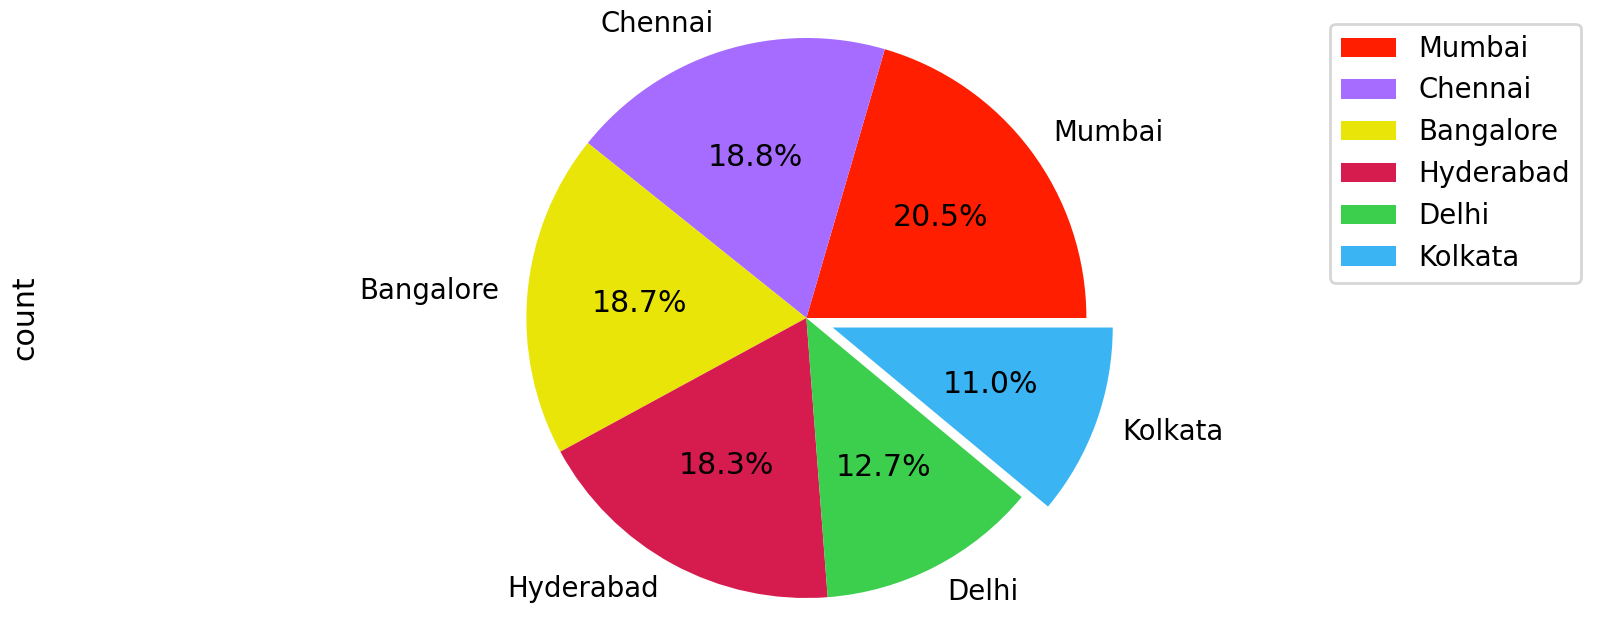

In [92]:
plt.figure(figsize=(20,8))
counts = df['City'].value_counts()
explode = (0, 0, 0, 0, 0, 0.1)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E', '#3AB4F2']

counts.plot(kind='pie', colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

### Scatter plot on house rents vs house sizes

Text(0, 0.5, 'Rent')

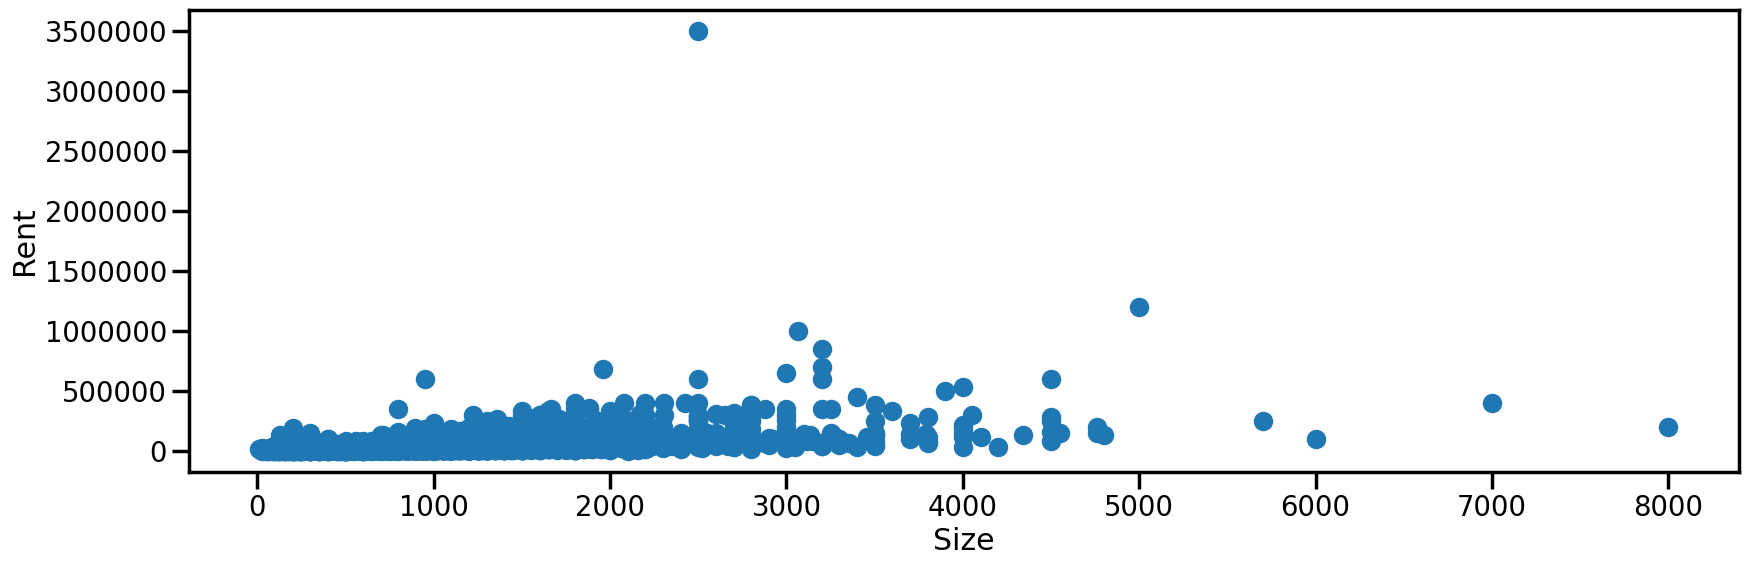

In [93]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
plt.scatter(df['Size'], df['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')

### Relationship between House Rent vs House Sizes

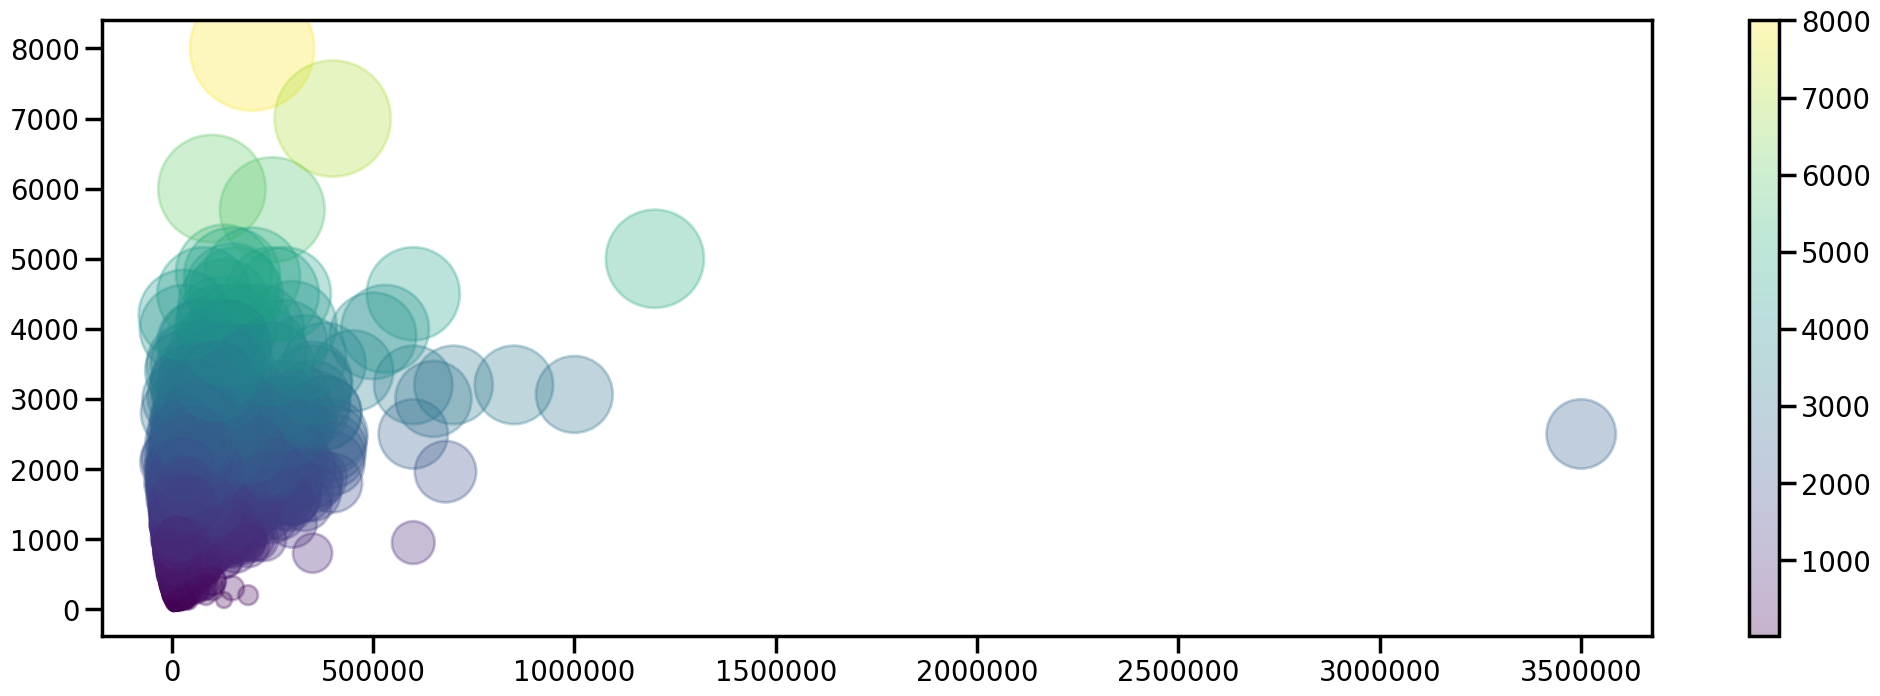

In [94]:
plt.figure(figsize = (25, 8))
plt.ticklabel_format(style = 'plain')
plt.scatter(df['Rent'], df['Size'], c = df['Size'], s = df['Size'], alpha = 0.3, cmap = 'viridis')
plt.colorbar()

### Bar plot for City vs house rent

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_15196/631163655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['City'], y=df['Rent'], palette='nipy_spectral')


<Axes: xlabel='City', ylabel='Rent'>

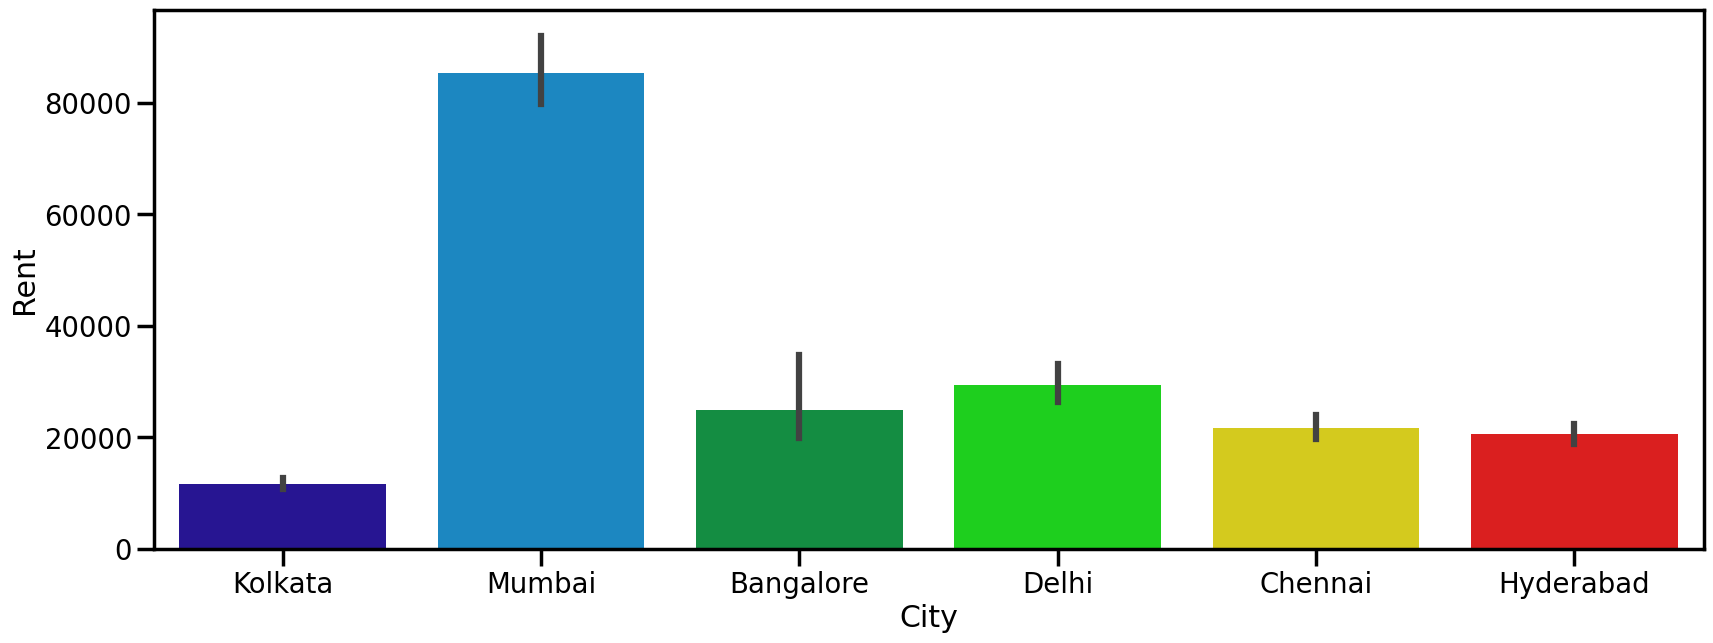

In [95]:
plt.figure(figsize=(20,7))
sns.barplot(x=df['City'], y=df['Rent'], palette='nipy_spectral')

### Histogram on house size

<Axes: >

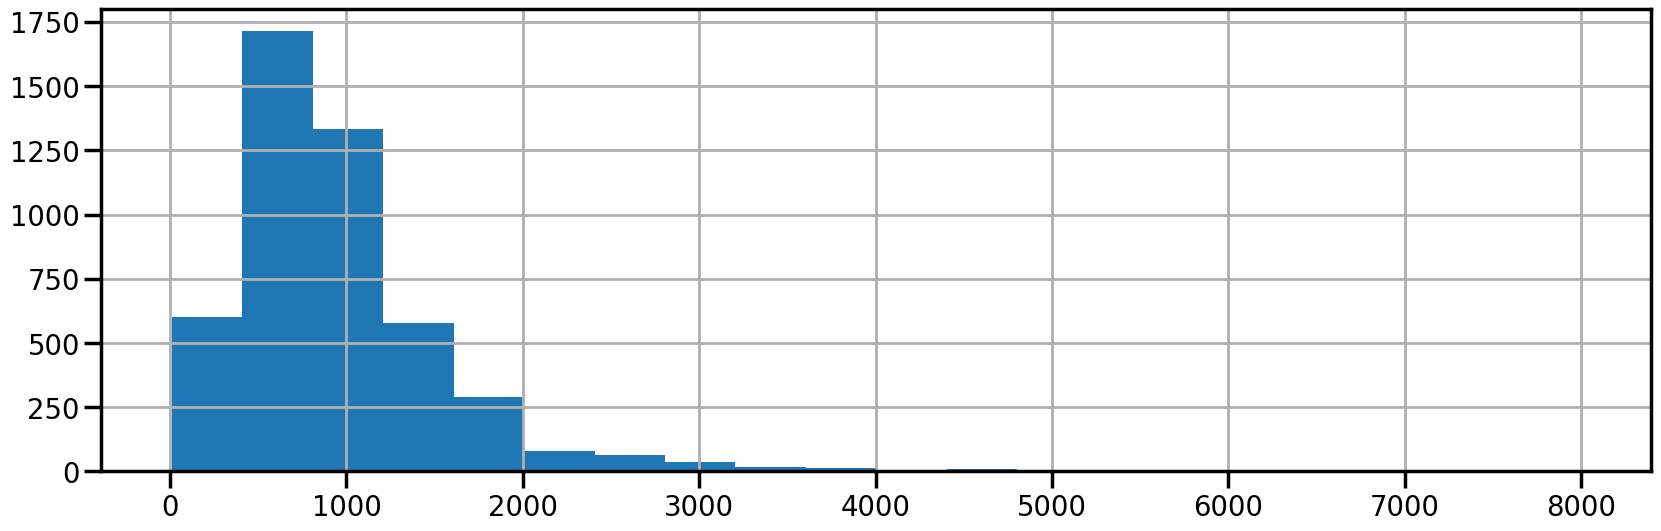

In [96]:
plt.figure(figsize = (20,6))
df['Size'].hist(bins = 20)

### Distribution of diferent number of BHK available in the dataset

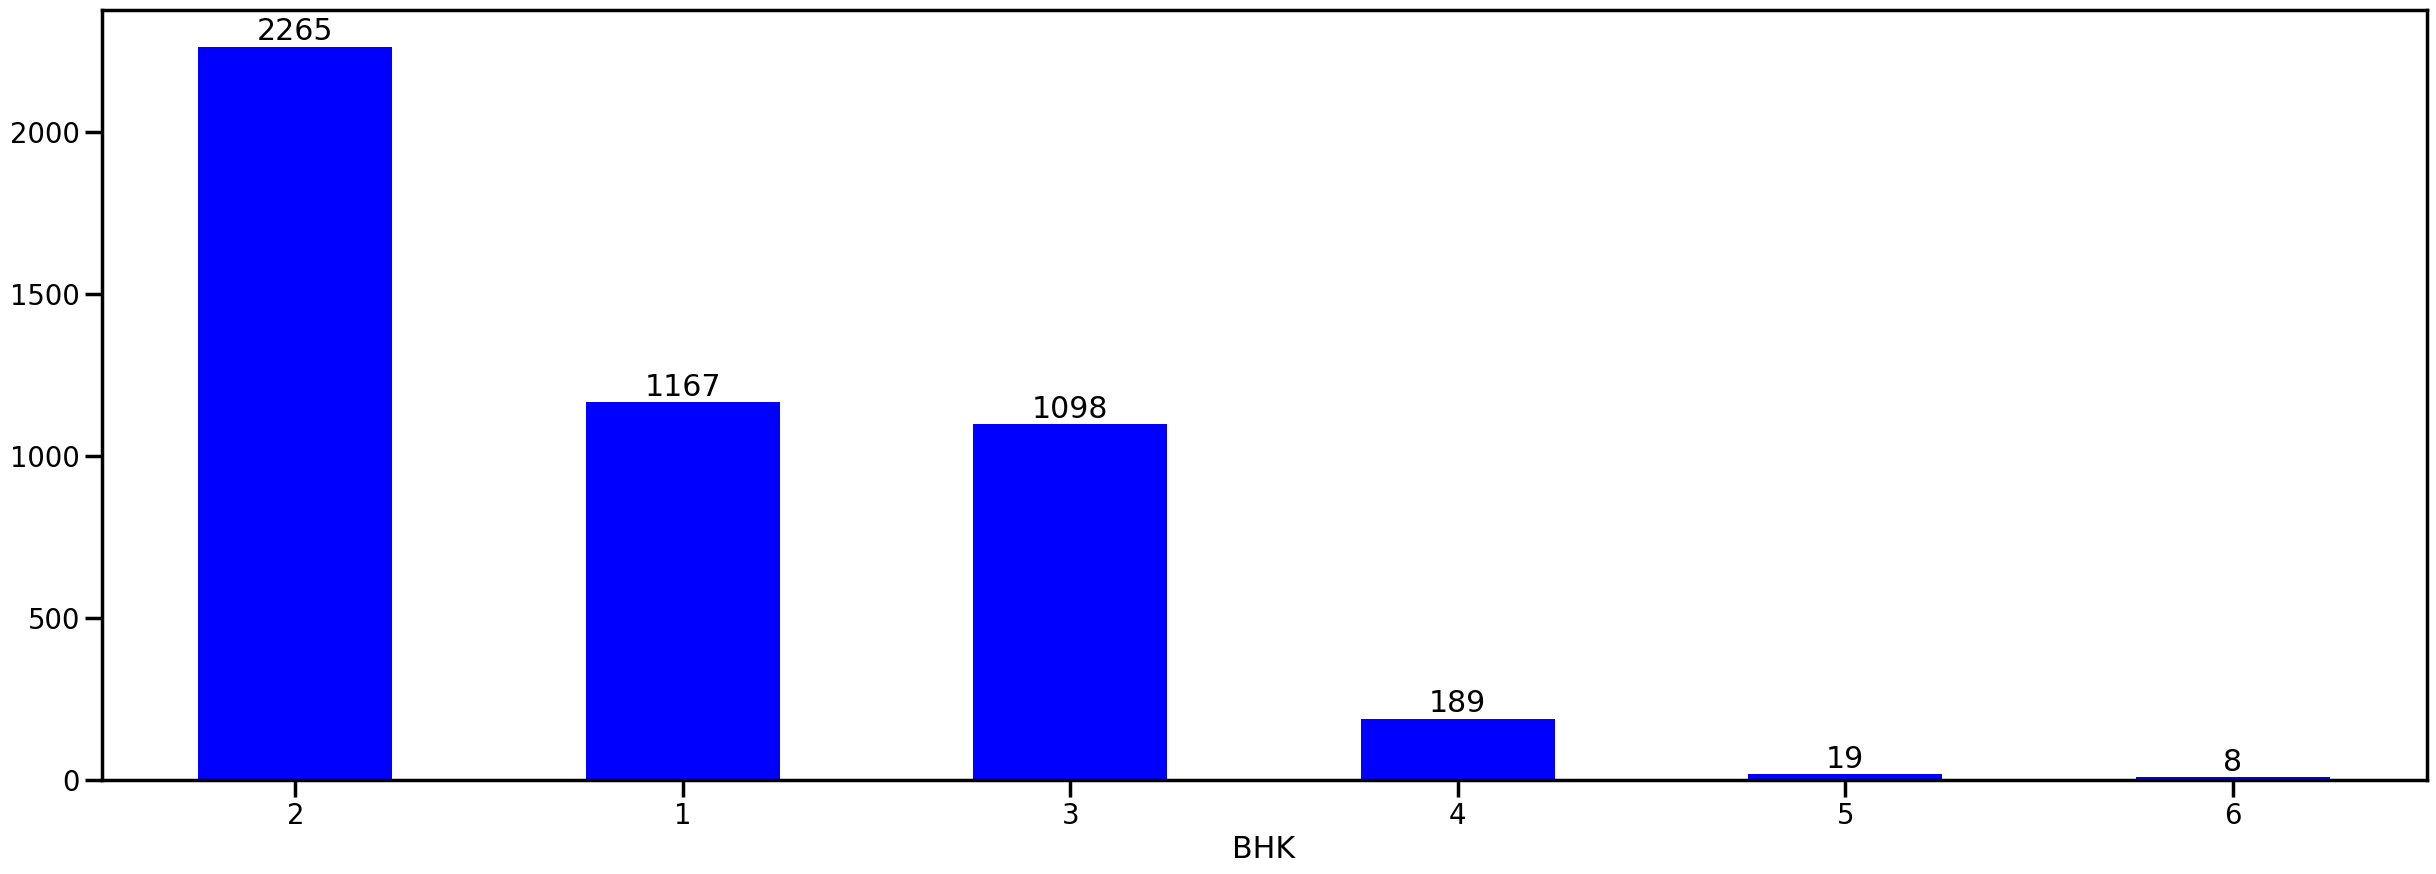

In [97]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(30,10))
ax = df['BHK'].value_counts().plot(kind = 'bar', color='blue', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')

### Distribution of different number of Bathrooms available in the Dataset

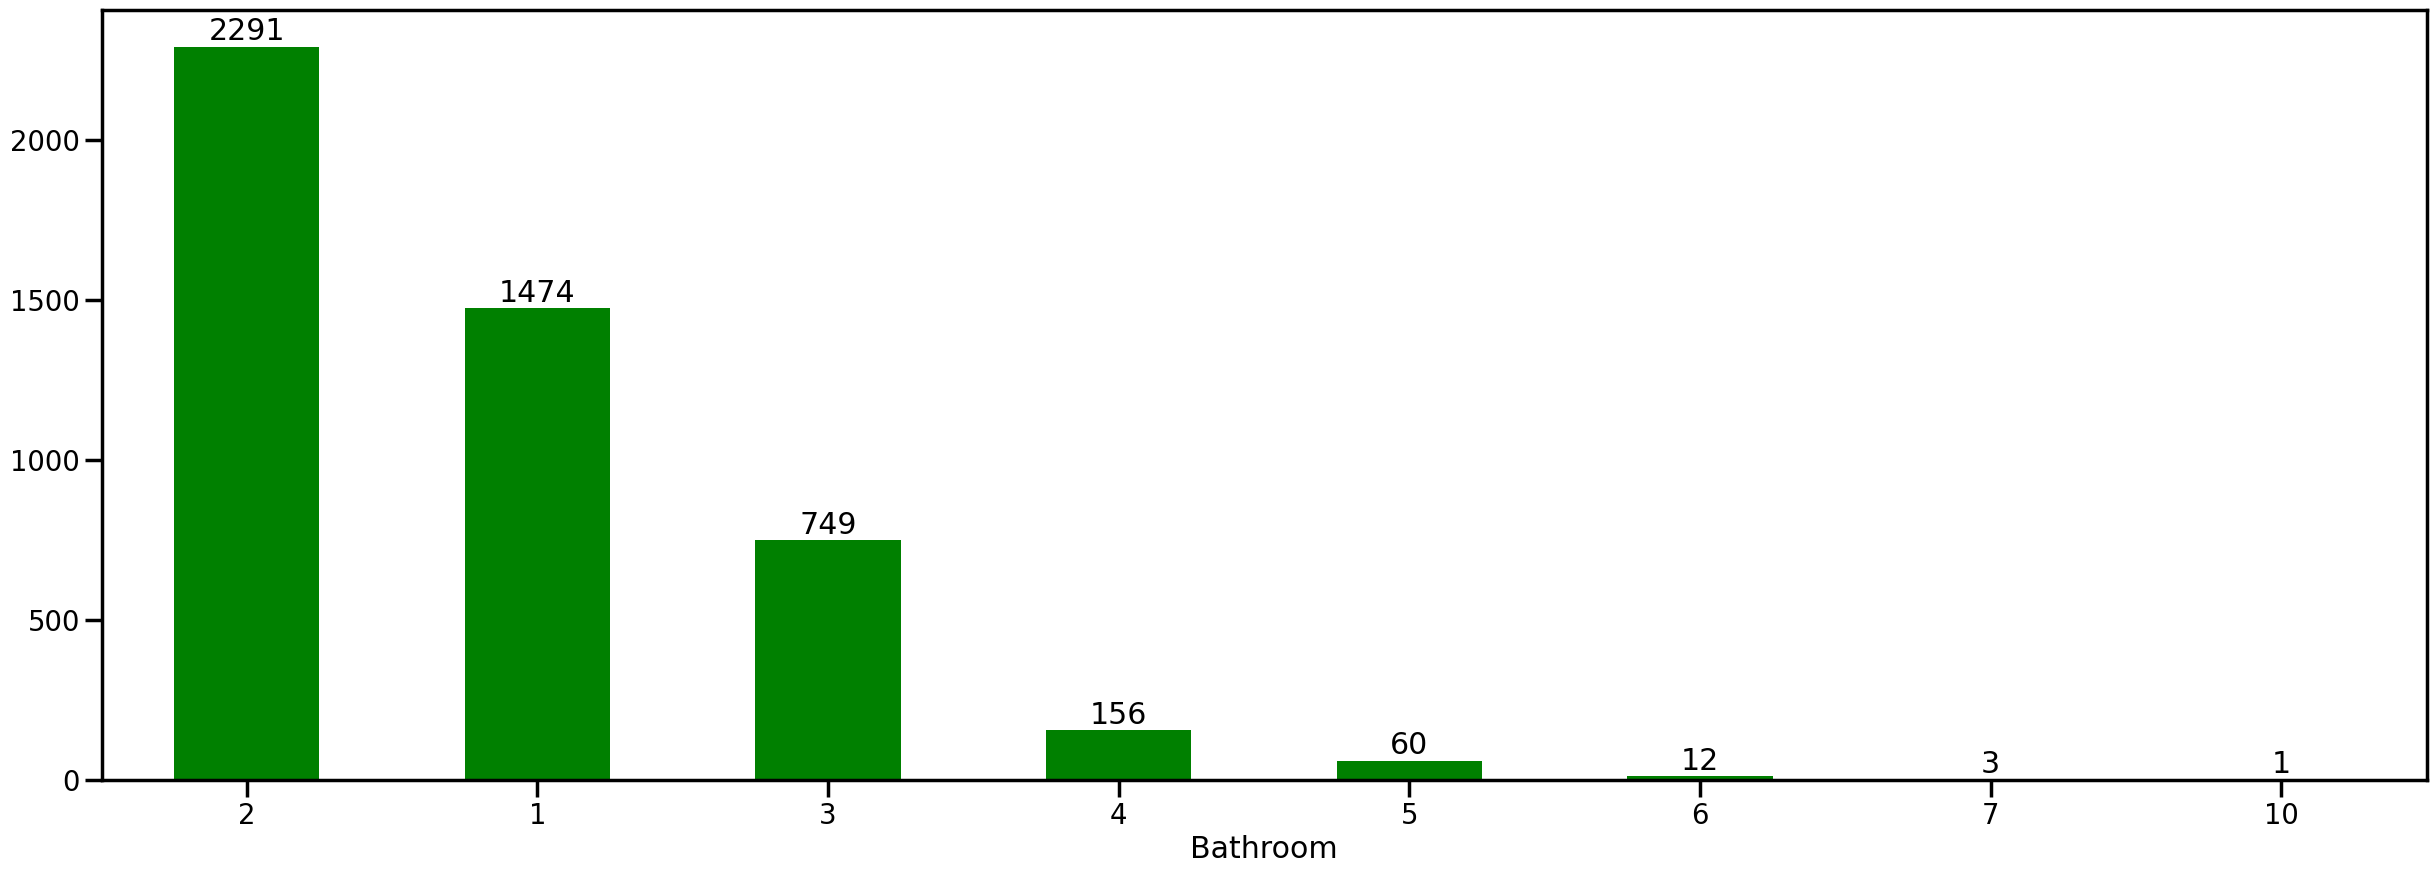

In [98]:
sns.set_context("poster", font_scale = .9)
plt.figure(figsize=(30,10))
ax = df['Bathroom'].value_counts().plot(kind = 'bar', color='green', rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')

### Heatmap on BHK vs Area Type

<Axes: xlabel='BHK', ylabel='Area Type'>

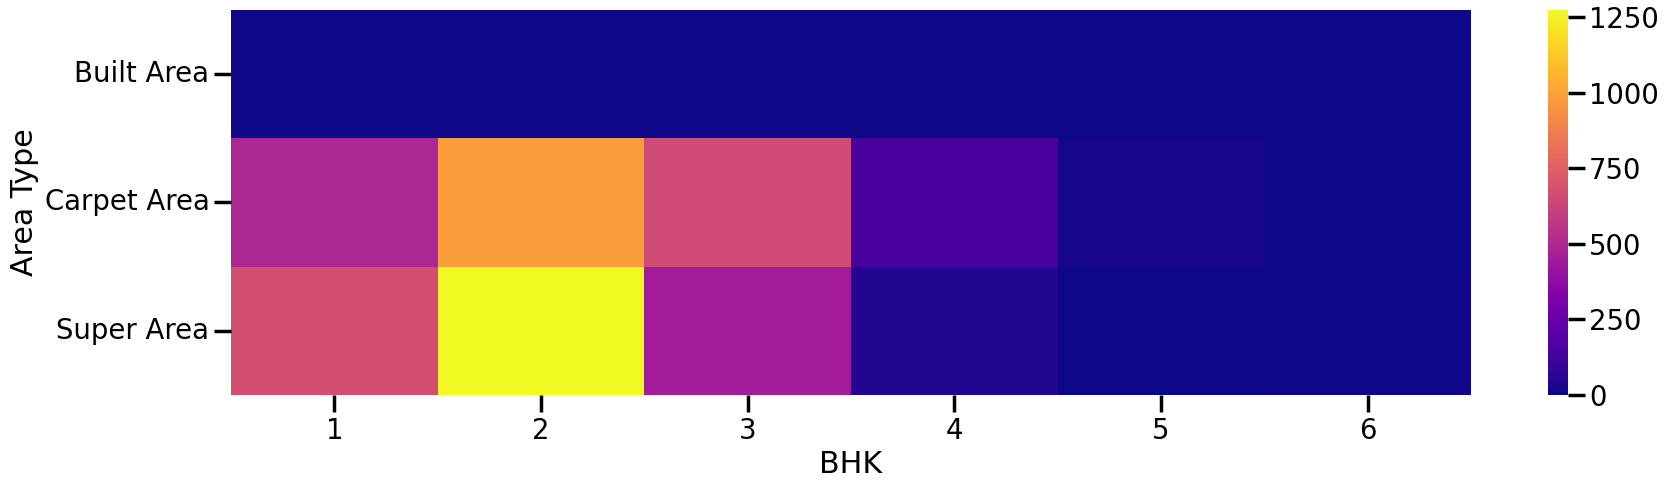

In [99]:
plt.figure(figsize = (20, 5))
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(df['Area Type'], df['BHK']), cmap = colormap)

In [100]:
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

<Axes: xlabel='Rent'>

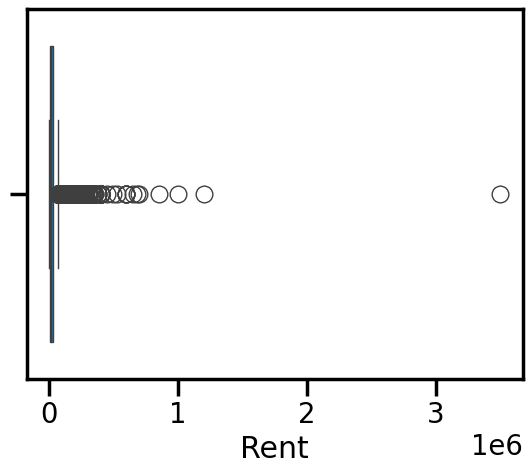

In [101]:
sns.boxplot(x='Rent', data=df)

As observed above, there is an outlier in the house rent data. We will remove it to facilitate a clearer visualization of the relationships between the different variables.

In [102]:
df.drop(df[df['Rent']== 3.500000e+06].index, axis=0, inplace=True)
df['Rent'].describe()

count    4.745000e+03
mean     3.426321e+04
std      5.975393e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      1.200000e+06
Name: Rent, dtype: float64

<Axes: xlabel='Rent'>

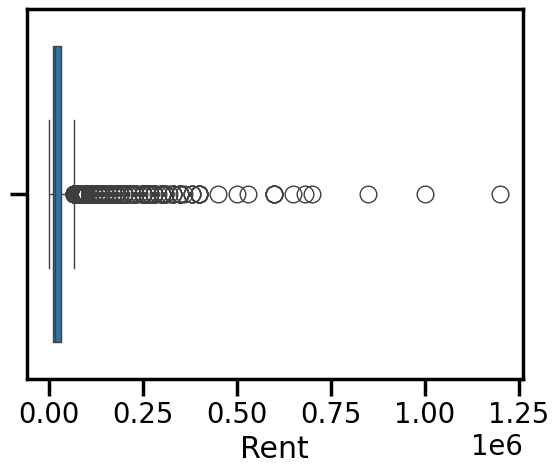

In [103]:
sns.boxplot(x='Rent', data=df)

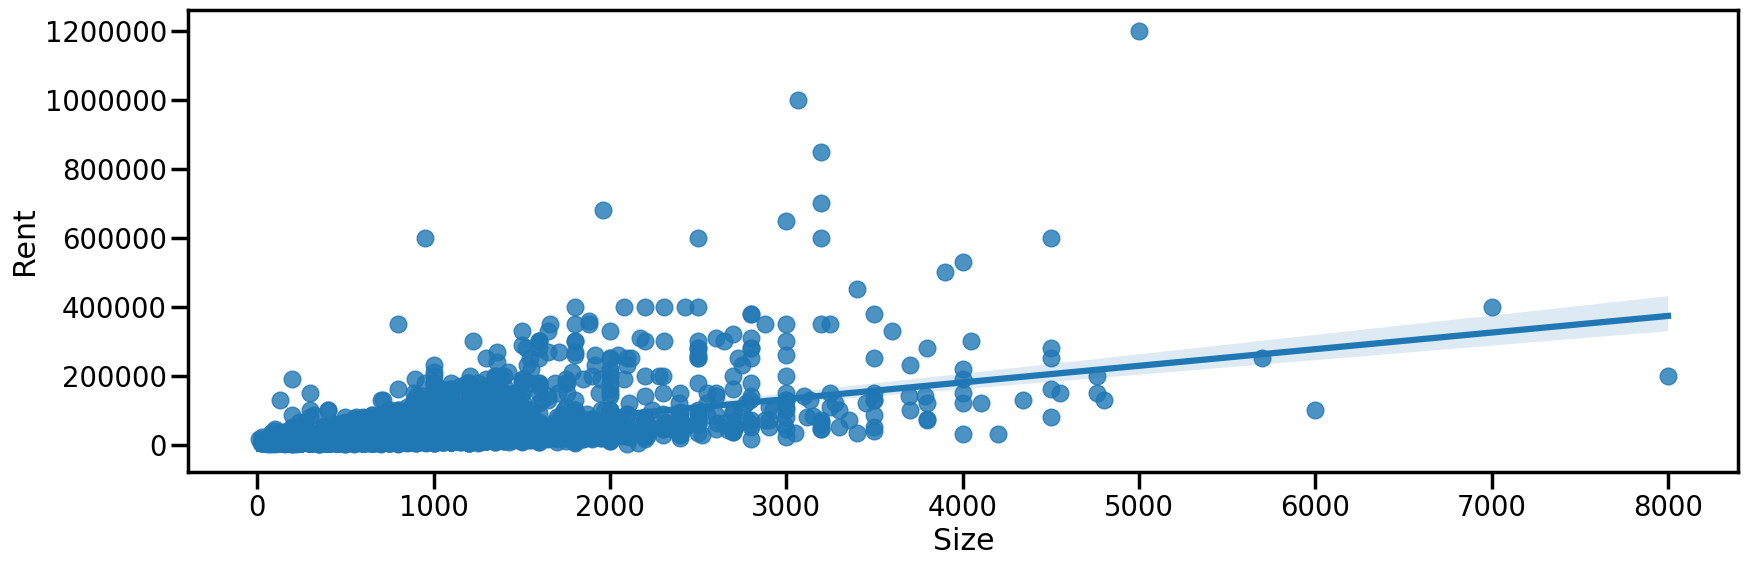

In [104]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.regplot(x='Size', y='Rent', data=df)
plt.show()

## Feature Engineering

In [105]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [107]:
df.shape

(4745, 12)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4745 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4745 non-null   object
 1   BHK                4745 non-null   int64 
 2   Rent               4745 non-null   int64 
 3   Size               4745 non-null   int64 
 4   Floor              4745 non-null   object
 5   Area Type          4745 non-null   object
 6   Area Locality      4745 non-null   object
 7   City               4745 non-null   object
 8   Furnishing Status  4745 non-null   object
 9   Tenant Preferred   4745 non-null   object
 10  Bathroom           4745 non-null   int64 
 11  Point of Contact   4745 non-null   object
dtypes: int64(4), object(8)
memory usage: 481.9+ KB


### Encoding data

In [109]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,455,2,221,4,2,1,2,2
1,21,2,20000,800,14,2,1527,4,1,1,1,2
2,24,2,17000,1000,14,2,1760,4,1,1,1,2
3,73,2,10000,800,10,2,526,4,2,1,1,2
4,17,2,7500,850,10,1,1890,4,2,0,1,2


Setting Rent as the last column of the dataset.

In [110]:
col = df.pop('Rent')
df['Rent'] = col
df.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,26,2,1100,455,2,221,4,2,1,2,2,10000
1,21,2,800,14,2,1527,4,1,1,1,2,20000
2,24,2,1000,14,2,1760,4,1,1,1,2,17000
3,73,2,800,10,2,526,4,2,1,1,2,10000
4,17,2,850,10,1,1890,4,2,0,1,2,7500


In [111]:
df.corr()['Rent'].sort_values()

Point of Contact    -0.426416
Area Type           -0.268346
Furnishing Status   -0.186922
Area Locality       -0.027176
Floor                0.025516
Tenant Preferred     0.029693
Posted On            0.140811
City                 0.292078
BHK                  0.469925
Size                 0.511398
Bathroom             0.562577
Rent                 1.000000
Name: Rent, dtype: float64

<Axes: >

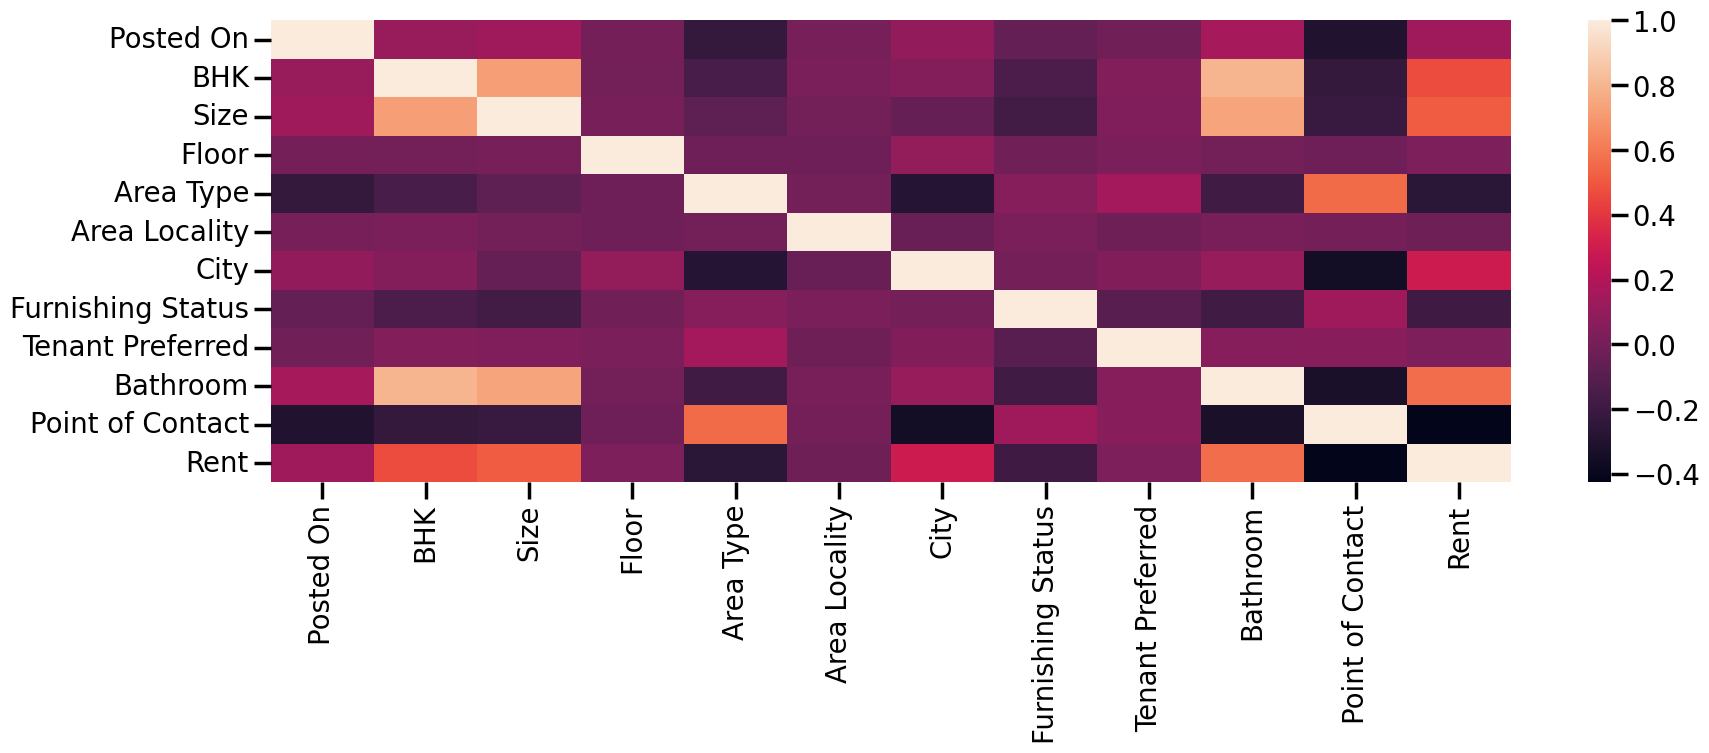

In [112]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr())

As observed in the heatmap, there is a strong negative correlation between the ‘Point of Contact’ and ‘Area Type’ with ‘Rent,’ whereas ‘BHK’ (Number of Bedrooms, Hall, Kitchen), size, and ‘Bathroom’ (Number of Bathrooms) exhibit a strong positive correlation with ‘Rent.’

### Scaling data

In [149]:
sc = StandardScaler()
df[['Size']] = sc.fit_transform(df[['Size']])
df[['Size']] = sc.fit_transform(df[['Size']])
df.head()

,Posted On,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Rent
0,26,2,0.209577,455,2,221,4,2,1,2,2,10000
1,21,2,-0.263750,14,2,1527,4,1,1,1,2,20000
2,24,2,0.051801,14,2,1760,4,1,1,1,2,17000
3,73,2,-0.263750,10,2,526,4,2,1,1,2,10000
4,17,2,-0.184862,10,1,1890,4,2,0,1,2,7500


### Splitting the data into training and testset

In [150]:
x = df.drop(['Rent', 'Floor', 'Posted On', 'Area Locality', 'Tenant Preferred', 'Furnishing Status'], axis=1)
y = df['Rent']
x.head()

,BHK,Size,Area Type,City,Bathroom,Point of Contact
0,2,0.209577,2,4,2,2
1,2,-0.263750,2,4,1,2
2,2,0.051801,2,4,1,2
3,2,-0.263750,2,4,1,2
4,2,-0.184862,1,4,1,2


We removed the columns with lower correlation to the target variable, ‘Rent,’ as they do not provide significant information to the model. Further analysis will be conducted to assess whether additional variables should be excluded due to multicollinearity.

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Modeling

In [152]:
lr = LinearRegression()
lr.fit(x_train, y_train)
yhat_lr = lr.predict(x_test)

In [153]:
print(mean_squared_error(y_test, yhat_lr))
print(r2_score(x_test['City'], y_test))

2860693396.9864497
-1990424779.2899578


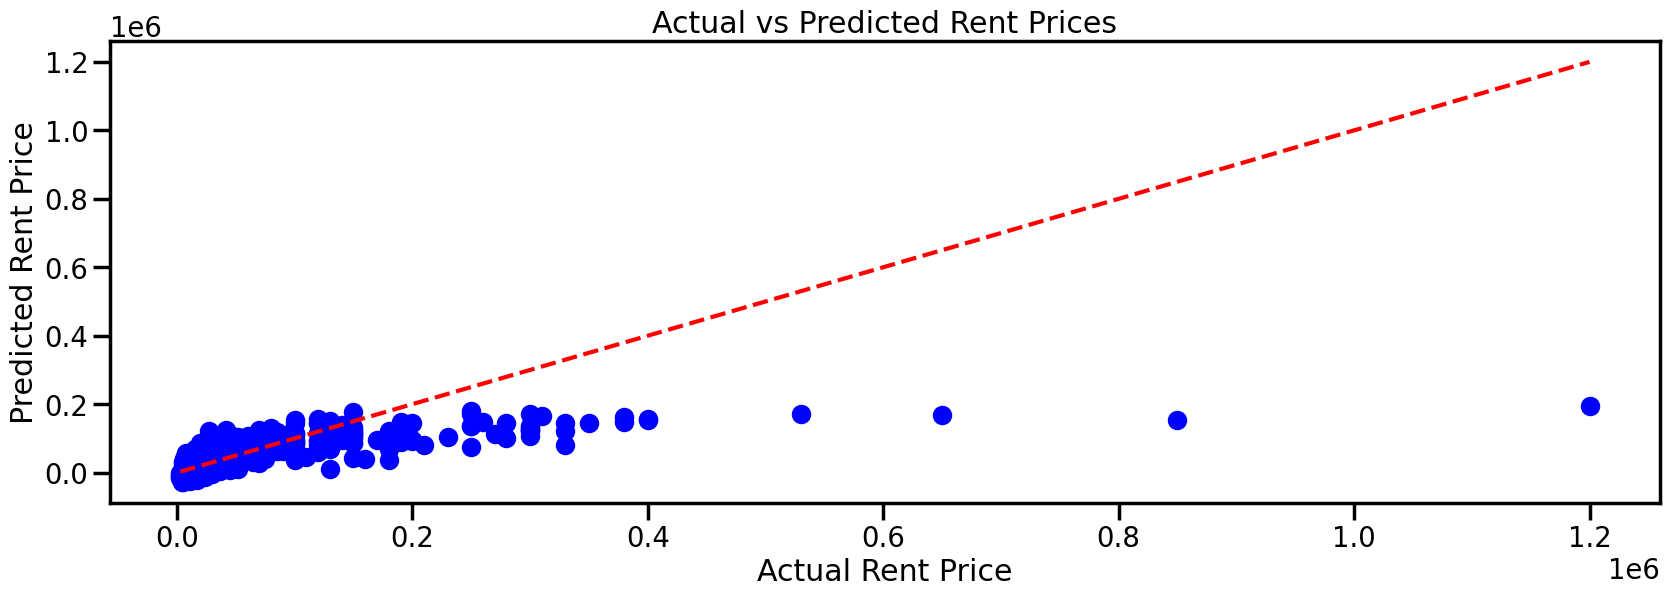

In [154]:
plt.figure(figsize=(20, 6))
plt.scatter(y_test, yhat_lr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Rent Price")
plt.ylabel("Predicted Rent Price")
plt.title("Actual vs Predicted Rent Prices")
plt.show()

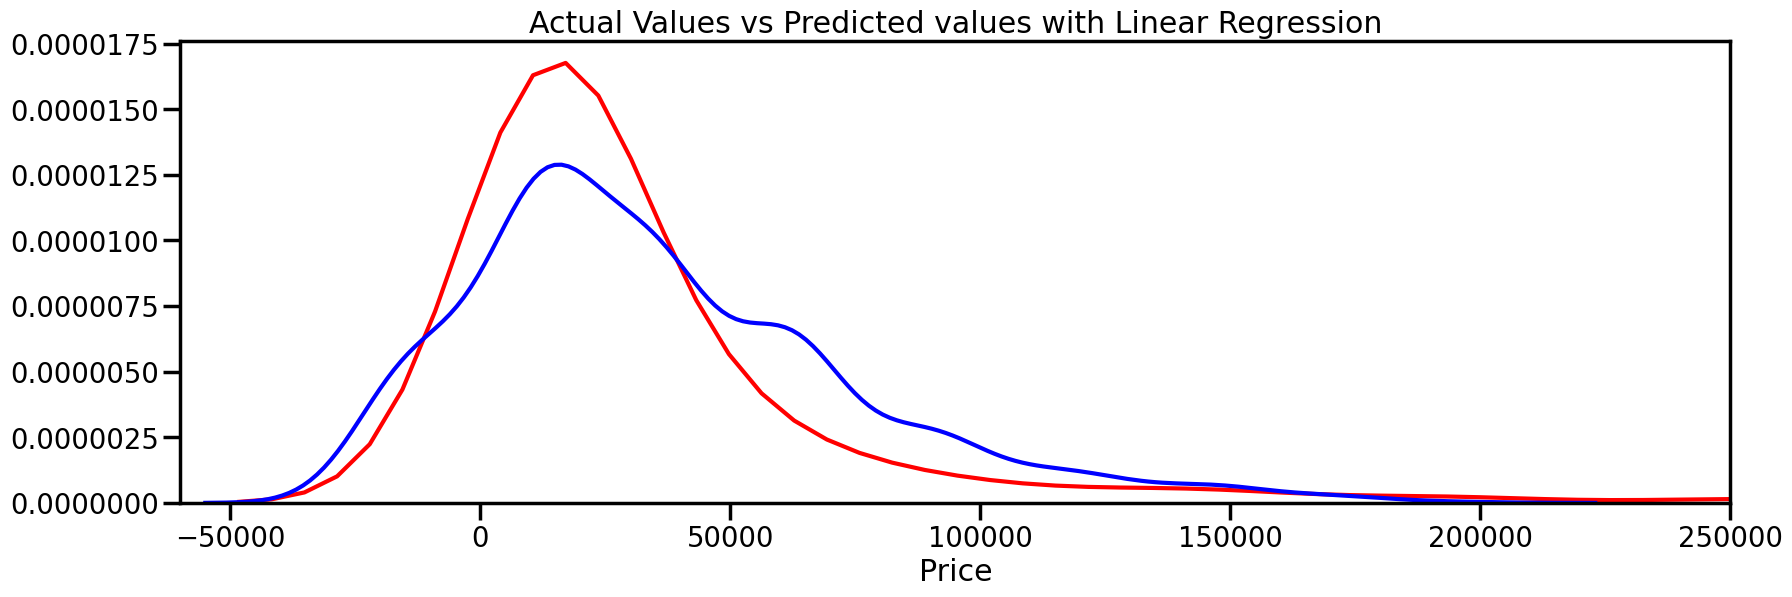

In [155]:
plt.figure(figsize=(20, 6))    
ax1 = sns.kdeplot(y_test, color="r", label=y_test)
ax2 = sns.kdeplot(yhat_lr, color="b", label=yhat_lr, ax=ax1)
plt.ticklabel_format(style='plain')
plt.xlim(-60000,250000)
plt.title('Actual Values vs Predicted values with Linear Regression')
plt.xlabel('Price')
plt.ylabel('')
plt.show()

The linear regression model doesn’t seem to align well with the actual values in the dataset. Let’s try fitting a polynomial regression to see if it provides a better fit. This approach will allow for more flexibility in capturing non-linear relationships between the variables and the target.

(0.0, 0.8)

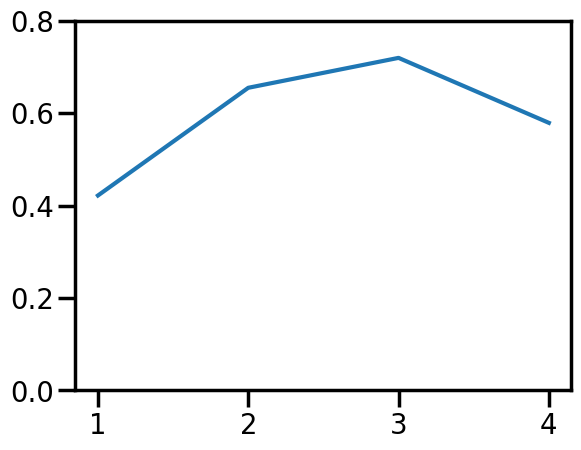

In [156]:
R2_values = []
order = range(1,5)

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    
    #yhat = poly.predict(x_test_pr)

    R2_values.append(poly.score(x_test_pr, y_test))

plt.plot(order, R2_values)
plt.ylim(0,.8)
    

In [157]:
R2_values

[0.4220399457698656,
 0.6551527363137826,
 0.7199142077726842,
 0.5792997726682174]

As we can see, the polynomial regression provides a better fit than the linear regression model. However, let’s push it further and explore other models to see if they can offer an even better fit. Techniques like decision trees, random forests, or gradient boosting might capture more complex relationships and improve our predictions. Let’s give them a shot.

In [145]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
accuracy_decision_tree = decision_tree.score(x_test, y_test)
accuracy_decision_tree

0.6383532269112193

In [163]:
random_forest = RandomForestRegressor(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
random_forest.fit(x_train, y_train)
accuracy_random_forest = random_forest.score(x_test, y_test)
accuracy_random_forest

0.7110754604797744

In [166]:
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(x_train, y_train)
accuracy_gradient_boost = gradient_boost.score(x_test, y_test)
accuracy_gradient_boost

0.7429060060177981